__реализация полиномиальной регрессии с помощью PyTorch__

Евгений Борисов esborisov@sevsu.ru

In [1]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [2]:
import numpy as np
from numpy import random as rng
import math

from matplotlib import pyplot as plt 

import torch

In [3]:
# генерируем данные, пакуем их в тензоры Torch
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

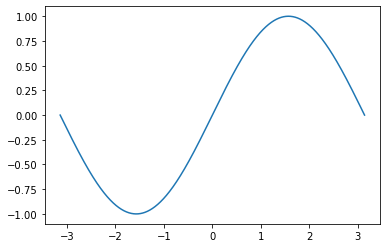

In [4]:
plt.plot(x,y)

---

$ y = a + b x + c x^2 + d x^3 $

In [5]:
# выполняем преобразование данных polynomial features
# (добавляем столбцы в матрицу датасета)
xx = x.unsqueeze(-1).pow( torch.tensor([1, 2, 3]) )

xx.shape

torch.Size([2000, 3])

In [6]:
yy = y.unsqueeze(-1)
yy.shape

torch.Size([2000, 1])

----

$$
y = 
a + b x + c x^2 + d x^3 =
\begin{bmatrix} 1 & x & x^2 & x^3 \end{bmatrix} \cdot 
\begin{bmatrix} a \cr b \cr c \cr d \end{bmatrix} 
$$

In [7]:
# модель регресии
model = torch.nn.Linear(xx.shape[1], 1)

----

In [9]:
# функция потери
loss_fn = torch.nn.MSELoss(reduction='sum')

# метод оптимизации
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

In [10]:
%%time

err_hist = [] # история изменения значений ф-ции потери

for t in range(2000):
    # вычисляем выход модели
    y_pred = model(xx)
    # считаем потерю
    loss = loss_fn(y_pred, yy)
    err_hist.append(loss.item())  
    # очищаем предыдущее значение градиента
    optimizer.zero_grad()
    # вычисляем текущее значение градиента ф-ции потери
    loss.backward()
    # изменение параметров
    optimizer.step()

CPU times: user 1.44 s, sys: 8.2 ms, total: 1.44 s
Wall time: 395 ms


In [11]:
# linear_layer = model[0]
# a = linear_layer.bias.item()
# b,c,d = linear_layer.weight[0,:]
# print(f'y = %.4f + %.4f x + %.4f x^2 + %.4f x^3'%( a,b,c,d ))

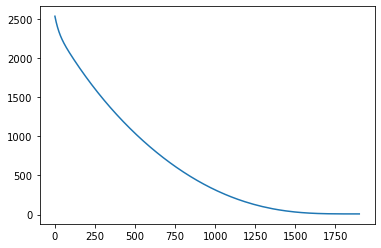

In [12]:
plt.plot(err_hist[100:])

----

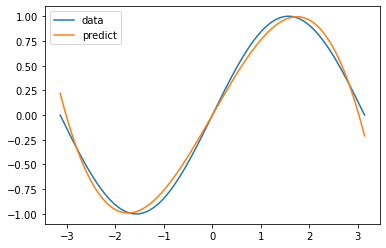

In [13]:
# проверяем результат

# выключаем расчёт градиентов
with torch.set_grad_enabled(False):
    y_pred = model(xx) # вычисляем значения регресии

# рисуем результат    
plt.plot(x,y,label='data')
plt.plot(x,y_pred,label='predict')
plt.legend()